# IMPLEMENTATION DES DIFFERENTS ALGORITHMES 

 J'utilise une approche objet : chaque morceau sera une classe, et des instances (des objets) seront utilisées pour toutes les composantes.

In [4]:
import numpy as np

class UCB1 :
    """we create a new type of object called UCB1 with 
    Attributes:
    _ _ _ _ _ _  
    n_arms:int the number of arms"""
    def __init__(self, n_arms):
        self.n_arms = n_arms  # numbers of arms
        self.counts = np.zeros(n_arms) # for any arms we store  the number of time that it was played in this numpy table initialize by full zeros
        self.values = np.zeros(n_arms) # we also done that for store the average for all arms
        self.total_counts = 0 # for store the moment t step by step

    def select_arm(self):

        """This methode return the maximum value of the upper bound cumullative"""
        if self.total_counts < self.n_arms:
            #chaque bras est joué une fois: c'est le tir initial
            return self.total_counts
        else:
            UCB1_values = self.values + np.sqrt(2 * np.log(self.total_counts) / self.counts)
            return np.argmax(UCB1_values)    

    def update(self, chosen_arm, reward):
        """ this methode is used to update our algorithm it is an recursive methode
        intput:
                - chosen_arm : is the arm considered as chosen
                - reward is the reward ontained through the choise  of the  arm called chosen_arm  """

        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n-1)/n)*value + (1/n)*reward #  il s'agit de la mise a jour de la moyenne empirique
        self.values[chosen_arm] = new_value

    




## Simulation de l'algorithme UCB 1

Nous souhaitons maintenant implémenter l’algorithme UCB1 et générer des graphes de regret, en considérant des récompenses de type Bernoulli. Pour cela, nous considérons le cas de K=2 bras, c’est-à-dire deux sources de récompenses aléatoires :

Le premier bras génère des observations issues d’une variable aléatoire 𝑋∼Bernoulli(1/3), Le second bras génère des observations(recompenses) issues d’une variable aléatoire Y∼Bernoulli(1/4) 

Recompense moyenne: 0.3253333333333333
Bras sélectionnés: [27944.  2056.]


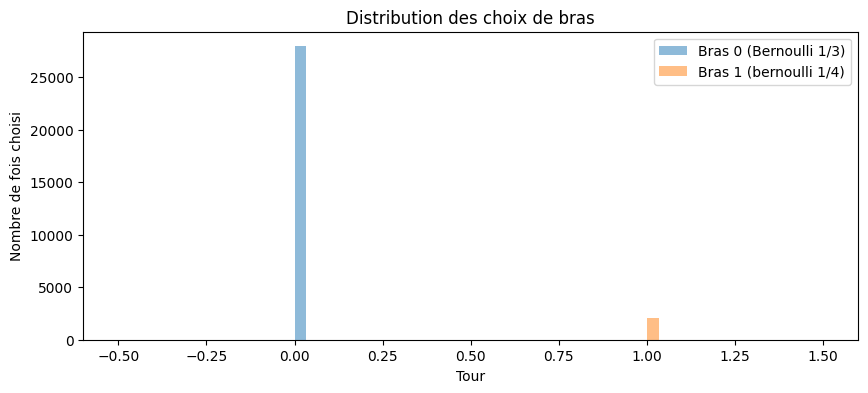

In [ ]:
import matplotlib.pyplot as plt


def distribution_reward(arm, p_1, p_2):
        if arm == 0:
            reward = np.random.binomial(1, p_1) # une bernoulli
        elif arm == 1:
            reward = np.random.binomial(1, p_2 ) # une bernoulli est une binomial 1
        else:
            raise ValueError(f"Arm {arm} invalide. Il faut que arm == 0 1.")
        return reward

def regret (expected_means, algo,n ):
    # regret
    tru_regret = max(expected_means) * n - np.sum(np.dot(expected_means, algo.counts))
    return tru_regret

n_rounds = 30000
algo = UCB1(n_arms=2)
rewards = []
chosen_arms = []
# Espérances des bras (estimées théoriquement)
expected_means = [1/3, 1/4]  
#mu_star = max(mu)
regrets_tru = [] 

#simulation
for t in range(1, n_rounds+1):
    arm = algo.select_arm()
    p_1 = 1/3
    P_2 = 1/4
    reward = distribution_reward(arm, p_1, P_2)
    algo.update(arm, reward)
    rewards.append(reward)
    chosen_arms.append(arm)
    tru_regret = regret(expected_means, algo, t)    
    regrets_tru.append(tru_regret)    
     
# on montre les resultats

print("Recompense moyenne:", np.mean(rewards))
print("Bras sélectionnés:", algo.counts)



# Visualisation
plt.figure(figsize=(10,4))
plt.hist([a for i, a in enumerate(chosen_arms) if a == 0], bins=30, alpha=0.5, label="Bras 0 (Bernoulli 1/3)")
plt.hist([a for i, a in enumerate(chosen_arms) if a == 1], bins=30, alpha=0.5, label="Bras 1 (bernoulli 1/4)")
plt.legend()
plt.title("Distribution des choix de bras")
plt.xlabel("Tour")
plt.ylabel("Nombre de fois choisi")
plt.show()

Le bras en bleu est le plus souvent choisit, ce qui concorde bien avec l'intuition car elle a une probabilité plus élevé comme paramètre

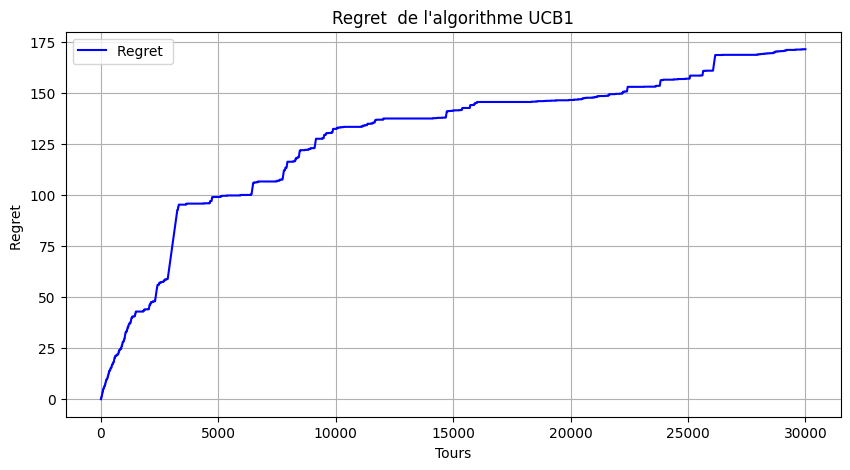

In [6]:
# Affichage : courbes de regret
plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret ", color='blue')

plt.xlabel("Tours")
plt.legend()
plt.ylabel("Regret ")
plt.title("Regret  de l'algorithme UCB1")
plt.grid(True)
plt.show()

 Définition :   On définit le regret cumulé après t  tours  comme :
    $
    R(t) = t\mu^* - \sum_{i=1}^K \mu_i\mathbb{E}[T_{i}(t)]
    $
    où $ \mu^* = \max_{i=1,\dots,K} \mu_i $ est la récompense moyenne maximale et $ T_{i}(t) $ est le nombre de fois que  le bras i a éte choisit parmis les $ t $ tours ainsi jusqu'a n.

Il mesure ce qu’on a perdu en ne jouant pas toujours le meilleur bras.

La courbe est croissante, mais de plus en plus plate

Si le regret est plat, ça veut dire que l’algorithme a appris le bon bras.

Si le regret continue à augmenter vite, l'algorithme n'apprend pas bien.

### MAJORATION THEORIQUE DU REGRET CUMULE

On implemente une majoration du regret cumulé pour voir a quel poin cette majoration s'eloigne du regret pour ce la on utilise la majoration theorique donnée par peter et aur dans leurs article qui est donne par :

$$
R(n) \leq \sum_{i:\Delta_i > 0} \left( \frac{8 \log n}{\Delta_i} + \left(1 + \frac{\pi^2}{3} \right) \Delta_i \right)
$$


####  Implementation

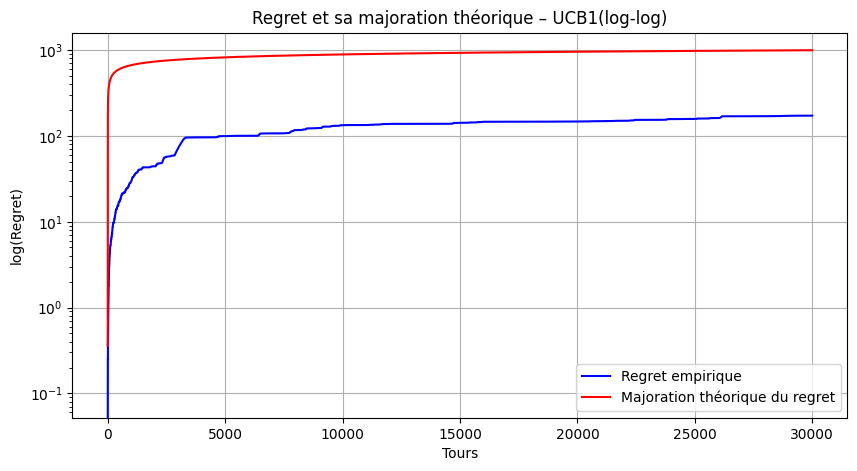

In [7]:
delta = [1/3- 1/4, 0.0]
th_bound = []

for t in range(1, n_rounds + 1):  # commencer à t=1 pour éviter log(0)
    bound = 0
    for d in delta:
        if d > 0:
            bound += (8 * np.log(t)) / d + (1 + np.pi ** 2 / 3) * d
    th_bound.append(bound)       

plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret empirique", color='blue')
plt.plot(th_bound, label="Majoration théorique du regret", color="red")
plt.yscale("log")

plt.xlabel("Tours")
plt.ylabel("log(Regret)")
plt.title("Regret et sa majoration théorique – UCB1(log-log)")
plt.legend()
plt.grid(True)
plt.show()




On souhaite maintenant appliquer cette politique toujours sur deux bras mais avec des parametres differents soit donc les bras suivants:

(0.9, 0.6), (0.9, 0.8), (1/3, 1/4), (0.55, 0.45)  on trace donc le graphes de regret 

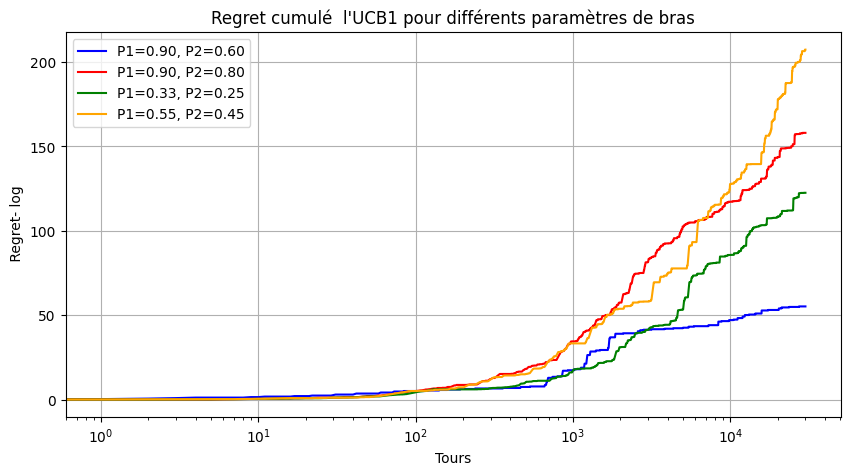

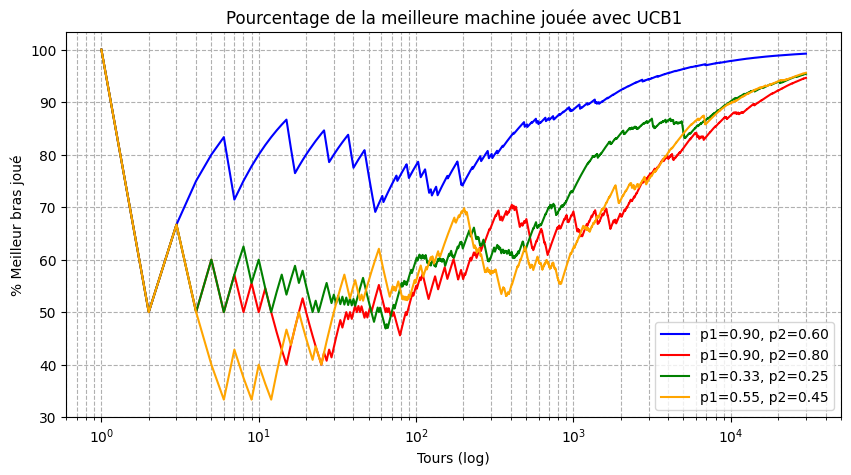

In [8]:
folowing_parameters = [(0.9, 0.6), (0.9, 0.8), (1/3, 1/4), (0.55, 0.45)]
colors = ["blue", "red", "green", "orange"]

plt.figure(figsize=(10, 5))

for idx, (P1, P2) in enumerate(folowing_parameters):
    algo = UCB1(n_arms=2)
    rewards = []
    chosen_arms = []
    regrets_tru = []
    expected_means = [P1, P2]

    for t in range(1, n_rounds + 1):
        arm = algo.select_arm()
        reward = distribution_reward(arm, P1, P2)
        algo.update(arm, reward)
        rewards.append(reward)
        chosen_arms.append(arm)
        tru_regret = regret(expected_means, algo, t)
        regrets_tru.append(tru_regret)

    # Tracé du log du regret
    plt.plot(regrets_tru, label=f"P1={P1:.2f}, P2={P2:.2f}", color=colors[idx])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Tours")
plt.ylabel(" Regret- log")
plt.title("Regret cumulé  l'UCB1 pour différents paramètres de bras")
plt.legend()
plt.grid(True)
plt.show()



## Courbe du pourcentage du meilleur bras joué
plt.figure(figsize=(10, 5))

for idx, (p1, p2) in enumerate(folowing_parameters):
    algo = UCB1(n_arms=2)
    chosen_arms = []
    best_arm = 0 if p1 >= p2 else 1
    best_arm_counts = []

    for t in range(1, n_rounds + 1):
        arm = algo.select_arm()
        reward = distribution_reward(arm, p1, p2)
        algo.update(arm, reward)
        chosen_arms.append(arm)

        best_arm_count = chosen_arms.count(best_arm)
        best_arm_counts.append(100 * best_arm_count / t)

    plt.plot(range(1, n_rounds + 1), best_arm_counts, 
             label=f"p1={p1:.2f}, p2={p2:.2f}", color=colors[idx])

plt.xscale('log')
plt.xlabel("Tours (log)")
plt.ylabel("% Meilleur bras joué")
plt.title("Pourcentage de la meilleure machine jouée avec UCB1")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
    


- le premier graphique:  les différentes courbes de regrets pour les paramètres énoncés, tracées avec une échelle log en abscisse
    
    On remarque que pour tous les paramètres on a les mêmes tendances de croissances, le fait d'appliquer un échelle logarithmique a l'axe des abscisses nous permet d'observer un sub-linéarité qui prouve que la croissance est logarithmique

- Le deuxième graphique représente pour un nombre de tours jouer le pourcentage d'avoir joué le bras

     - on remarque que pour tous les paramètres on a presque les mêmes tendances ce qui prouve que l'algorithme apprend  correctement  

# Implementation de l'algorithme ETC

Ici on dispose toujours de K bras, a la seul difference que l'on procède  en deux etapes:

- On explore chaques bras m fois et on calcule pour chaque bras la moyenne empirique des recompences 
- puis on prend le bras avec la plus grande  moyenne empirique

Ansi le bras $A_t$ choisit est :

$$
    A_t = argmax_i \hat{\mu_i}(mk)

$$   

Pour des raisons de non redondance, on va creer un classe fille qui herite des attribut de la classe UCB 1 

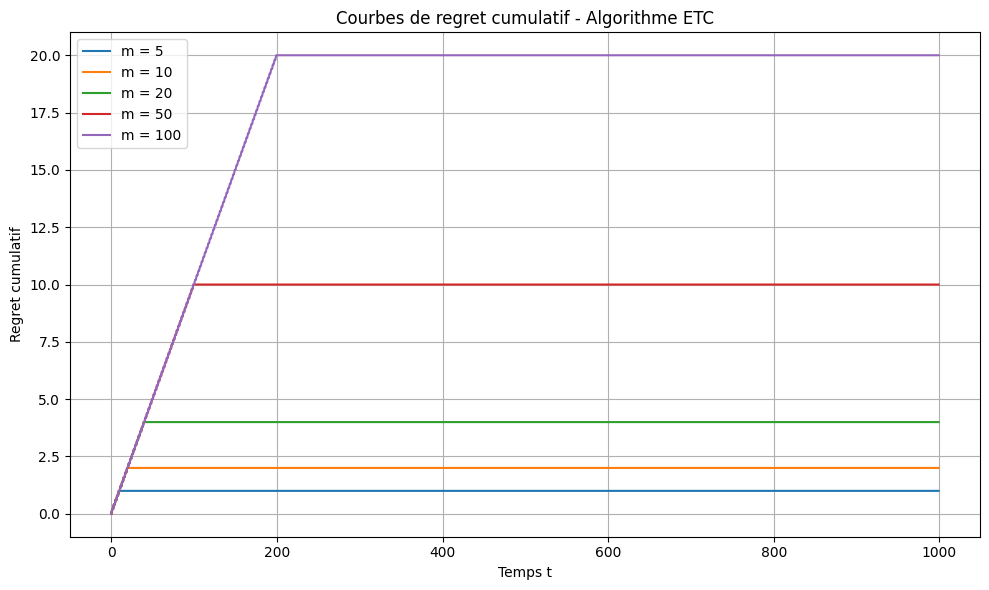

In [ ]:

class ETC:
    def __init__(self, m, k=2):
        self.m = m
        self.k = k
        self.counts = np.zeros(k)
        self.rewards = np.zeros(k)
        self.t = 0
        self.commit_arm = None

    def select_arm(self):
        self.t += 1
        if self.t <= self.m * self.k:
            return (self.t ) % self.k
        else:
            if self.commit_arm is None:
                averages = self.rewards / self.counts
                self.commit_arm = np.argmax(averages)
            return self.commit_arm

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.rewards[chosen_arm] += reward

# --- Fonction de récompense Bernoulli ---
def distribution_reward(arm, p1, p2):
    p = [p1, p2]
    return np.random.binomial(1, p[arm])

# --- Simulation pour plusieurs valeurs de m ---
m_values = [5, 10, 20, 50, 100]
regret_curves = {}

for m in m_values:
    algo = ETC(m=m, k=2)
    regrets = []
    cumulative_regret = 0

    for t in range(T):
        arm = algo.select_arm()
        reward = distribution_reward(arm, p1, p2)
        algo.update(arm, reward)

        regret = optimal_mean - (p1 if arm == 0 else p2)
        cumulative_regret += regret
        regrets.append(cumulative_regret)

    regret_curves[m] = regrets

# --- Tracé des graphes ---
plt.figure(figsize=(10, 6))
for m, regrets in regret_curves.items():
    plt.plot(regrets, label=f"m = {m}")
plt.title("Courbes de regret cumulatif - Algorithme ETC")
plt.xlabel("Temps t")
plt.ylabel("Regret cumulatif")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Voici les courbes de regret cumulatif pour différentes valeurs de m dans l'algorithme Explore-Then-Commit (ETC) :

Chaque courbe correspond à une valeur différente de 𝑚 ∈ {5,10,20,50,100}. L’horizon total est fixé à T=500.Les probabilités de succès des deux bras sont 
p1 = 0.5, p2 = 0.7 (le bras 2 est optimal).

 - Observations :
Pour de petits m, l’exploration est rapide, donc le regret reste faible si le meilleur bras est identifié correctement. Pour de grands m, l’algorithme explore plus longtemps, ce qui augmente le regret initial. Si l’identification échoue, le regret continue à croître après le commit. Le plateau observé correspond à la phase où l’algorithme s’est engagé sur un bras.

### Remarques et comparaisons


L’algorithme UCB1 est un algorithme adaptatif, qui équilibre automatiquement l’exploration et l’exploitation. À chaque tour, il choisit le bras avec la plus haute borne supérieure de confiance :  

$$
\hat{\mu}_i + \sqrt{\frac{2 \ln t}{N_i}}
$$

Il continue donc d’explorer même tardivement si l’incertitude le justifie. Il ne nécessite aucun paramètre de réglage, ce qui le rend robuste et efficace. Son regret cumulatif est logarithmique en fonction du nombre de tours :  

$$
O(\log T)
$$



À l’inverse, l’algorithme ETC (Explore-Then-Commit) est non adaptatif, car il sépare clairement exploration et exploitation. Il commence par tirer chaque bras un nombre fixe de fois (paramètre \(m\)), puis choisit le bras avec la meilleure moyenne empirique pour le reste des tours.  

Cette approche est très simple à implémenter mais dépend fortement du choix de \(m\) :  
- Si \(m\) est trop petit, l’algorithme risque de choisir le mauvais bras.  
- Si \(m\) est trop grand, il gaspille des tours en exploration inutile.

Son regret est aussi logarithmique si \(m\) est bien calibré, sinon il peut être beaucoup plus élevé.  



En résumé, UCB1 est généralement préféré en pratique pour sa robustesse et sa capacité d’adaptation sans réglage, tandis que ETC est simple mais sensible au paramètre \(m\).


### EPSOLON-GREEDY ALGORITHM 

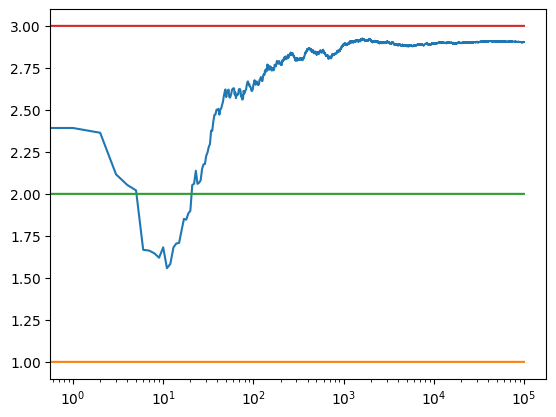

0.9904996366039001
1.9908199465287564
3.0038607743208736


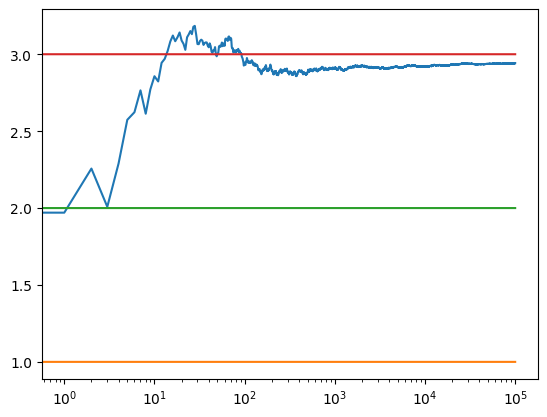

0.9944743875173881
1.9823474207640446
2.9929580995562453


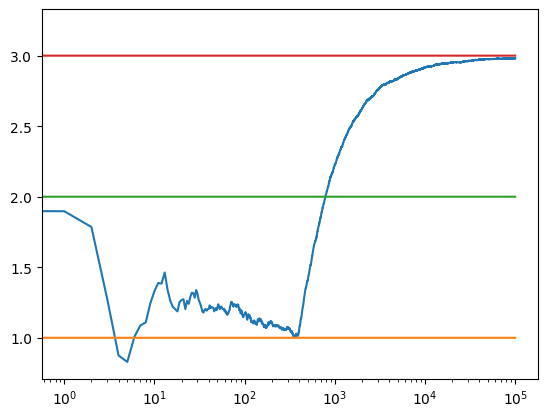

1.0007748811685775
1.9822132185306367
2.9996437278201884


In [10]:



# Define Action class
class Actions:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  # Choose a random action
  def choose(self): 
    return np.random.randn() + self.m

  # Update the action-value estimate
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x


def run_experiment(m1, m2, m3, eps, N):
    
  actions = [Actions(m1), Actions(m2), Actions(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([a.mean for a in actions])
    x = actions[j].choose()
    actions[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for a in actions:
    print(a.mean)

  return cumulative_average


if __name__ == '__main__':
    
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

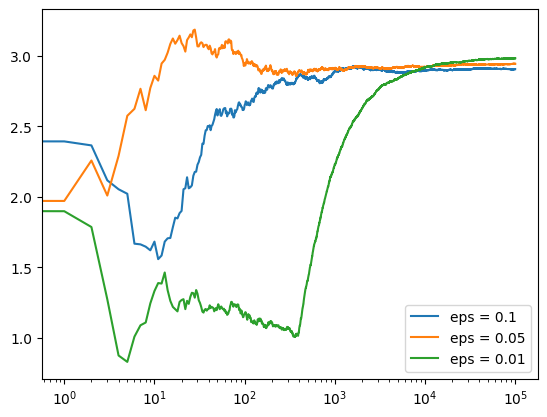

In [11]:
# log scale plot
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

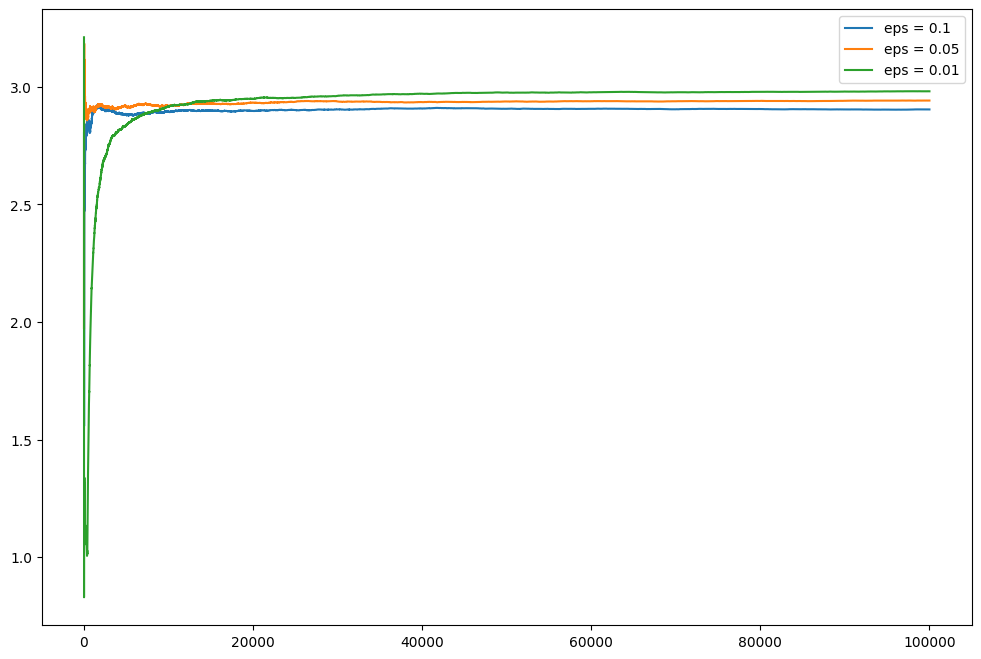

In [12]:
# linear plot
plt.figure(figsize = (12, 8))
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.show()

Cet algorithme oscille de manière aléatoire entre explorer et exploiter avec une probabilité de $1- \epsilon $ d'exploiter et $\epsilon $ d'explorer ie d'agrandir ses connaissances

# UCB-type Algorithm phi-mixing bandits

## Simulations: iid setting Bras bernoulli

On teste une implementation sur 2 bras les mêmes que lors de l'implementation de l'algorithme UCB1 et pour le moment on considère que tous les bras ont des  recompenses indépendantes et identiquement distribuées 

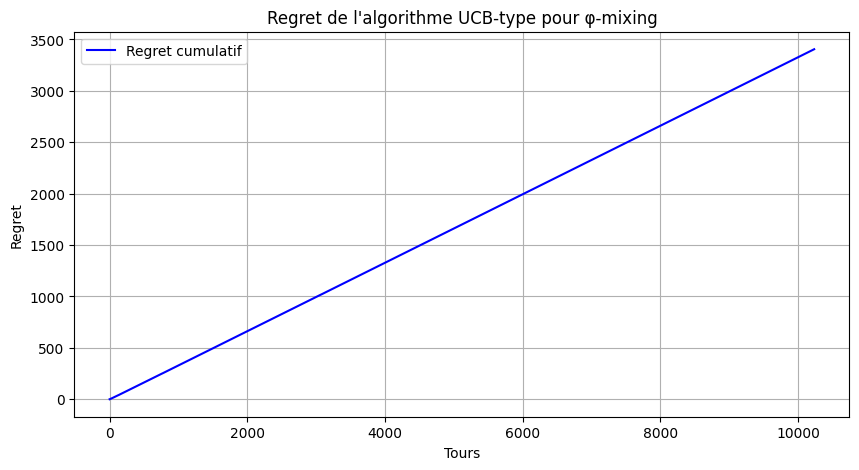

In [3]:
# Re-importing required libraries due to execution environment reset
import numpy as np
import matplotlib.pyplot as plt

class UCBPhiMixing:
    def __init__(self, k_arms, norm_phi):
        self.k = k_arms
        self.norm_phi = norm_phi
        self.s = np.zeros(k_arms, dtype=int)  # s_i : nombre de fois que le bras i a été sélectionné
        self.empirical_means = np.zeros(k_arms)
        self.total_time = 0
        self.xi = 1 + 8 * self.norm_phi
        self.arm_history = []
        self.regret_history = []

    def initialize(self, reward_function):
        # Play each arm once
        for i in range(self.k):
            reward = reward_function(i)
            self.empirical_means[i] = reward
            self.s[i] = 1
            self.total_time += 1
            self.arm_history.append(i)

    def select_arm(self):
        t = self.total_time
        ucb_scores = []
        for i in range(self.k):
            s_i = self.s[i]
            bonus = np.sqrt((8 * self.xi * (1 / 8 + np.log(t))) / (2 ** s_i)) + (self.norm_phi) / (2 ** (s_i - 1))
            ucb = self.empirical_means[i] + bonus
            ucb_scores.append(ucb)
        max_ucb = max(ucb_scores)
        best_arms = np.argmax(ucb_scores) #[i for i, u in enumerate(ucb_scores) if np.isclose(u, max_ucb)]
        return np.min(best_arms)

    def update(self, chosen_arm, rewards_batch):
        s_j = self.s[chosen_arm]
        t_j = self.total_time
        n = len(rewards_batch)
        old_mean = self.empirical_means[chosen_arm]
        new_mean = (old_mean * (2 ** s_j) + np.sum(rewards_batch)) / (2 ** s_j + n)
        self.empirical_means[chosen_arm] = new_mean
        self.s[chosen_arm] += 1
        self.total_time +=n
        self.arm_history.extend([chosen_arm] * n)

    def run(self, n_total, reward_function, optimal_mean):
        self.initialize(reward_function)

        cumulative_reward = 0
        self.regret_history = []

       # boucle principale
        while self.total_time < n_total:
            j = self.select_arm()
            s_j = self.s[j]
            n_j = 2 ** s_j
            rewards = [reward_function(j) for _ in range(n_j)]
            self.update(j, rewards)
            for r in rewards:
                cumulative_reward += r
                t_current = len(self.regret_history) 
                #self.total_time += 1
                t_curent = len(self.regret_history)+1 
                regret = optimal_mean * (t_curent+1) - np.sum([self.s[i]*means[i] for i in range(self.k)])
                self.regret_history.append(regret)

                """if t_current >= n_total:
                    break"""
           
        return self.arm_history, self.regret_history


# Simulation
n_total = 100000
k = 2
norm_phi = 0 # we assume that the phi coefficient are 0 
means = [1/3, 1/4]
optimal_mean = max(means)

def reward_function(arm):
    return np.random.binomial(1, means[arm])

algo = UCBPhiMixing(k_arms=k, norm_phi= norm_phi)
arms, regret_history = algo.run(n_total=10000, reward_function=reward_function, optimal_mean=optimal_mean)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot( regret_history, label='Regret cumulatif', color='blue')
plt.xlabel("Tours")
plt.ylabel("Regret")
plt.title("Regret de l'algorithme UCB-type pour φ-mixing")
plt.grid(True)
plt.legend()
plt.show()





### Interpretations
Ce graphique de regret cumulatif respecte deja toutes les normes que doivent respecter un graphe de regret cumulatif:
- il est croissant et quasi concave et de sur quoi est non derivable
- il est quasi constant a partir d'un certain tours ce qui prouve que l'algorithme a appris a choisir le meilleur bras au fil de l'exploration
Tout ceci prouve bien que cet algorithme est bien un algorithme d'apprentissage par renforcement

- La tendance en escalier est du au fait que l'algorithme joue un bras deux a la  puissance le nombre de fois qu'il est  choisit d'itérations consécutives et met a jours les moyennes empiriques pareillement



## Simulation: Marchov chains setting 

### Description de la simulation

Ici, on simule un problème à deux bras :

- **Bras 1** : une loi de Bernoulli i.i.d. de paramètre 0.3.
- **Bras 2** : génère des récompenses issues d'une chaîne de Markov à 2 états, avec un espace d'états \( E = \{0, 1\} \).

La matrice de transition de cette chaîne est donnée par :

\[
P = \begin{bmatrix}
1 - \epsilon & \epsilon \\
\epsilon & 1 - \epsilon
\end{bmatrix}
\]

On fait varier \(\epsilon\) parmi les valeurs \([0.5, 0.6, 0.7, 0.8, 0.9, 0.95]\).



### Remarques théoriques

La moyenne stationnaire du bras 2 est théoriquement égale à 0.5, quelle que soit la valeur de \(\epsilon\).



### Objectif

L'intérêt d'utiliser un bras avec des récompenses markoviennes est de sortir du cadre classique des algorithmes de bandits, qui supposent généralement des récompenses i.i.d.

Cela permet d'étudier la robustesse des algorithmes dans un contexte où les bras ne suivent pas forcément des distributions indépendantes.

La chaîne de Markov est un exemple typique de dépendance : la récompense à l'étape \(t\) dépend uniquement de l'état à l'étape \(t-1\), ce qui introduit une corrélation temporelle dans les observations.


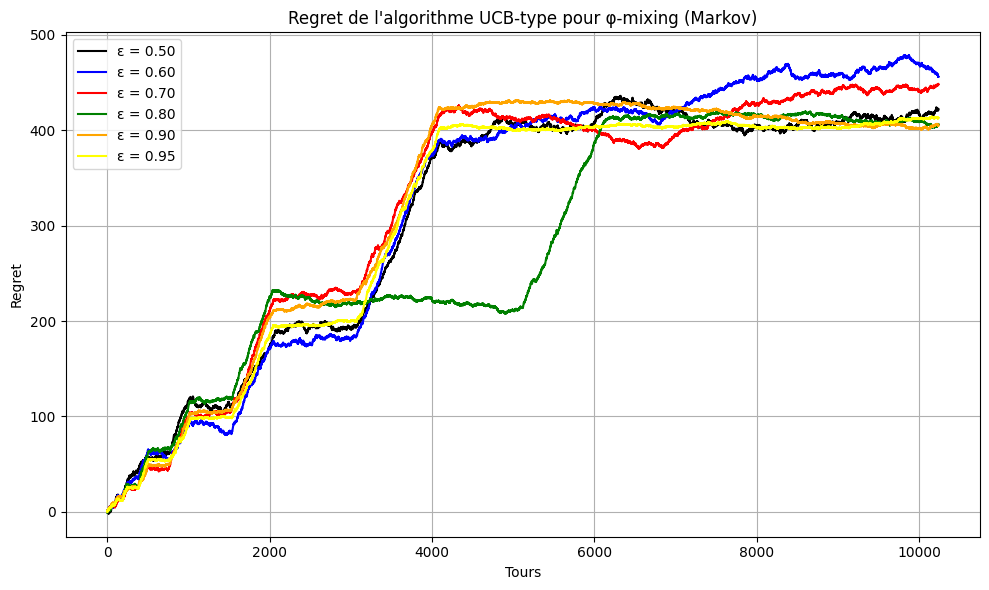

In [14]:
# Re-importing required libraries after reset
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Implémentation manuelle d'une chaîne de Markov binaire
class BinaryMarkovChain:
    def __init__(self, epsilon, initial_state=0):
        self.epsilon = epsilon
        self.current_state = initial_state

    def sample(self, n):
        sequence = []
        for _ in range(n):
            if random.random() < 1 - self.epsilon:
                sequence.append(self.current_state)
            else:
                self.current_state = 1 - self.current_state
                sequence.append(self.current_state)
        return sequence

# Paramètres de simulation
folowing_eps = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
colors = ["black", "blue", "red", "green", "orange", "yellow"]

# Fonction de récompense
def def_rewards_makovsetting(arm):
    if arm == 0:
        reward_0= np.random.binomial(1, 0.3)
    elif arm == 1:
        global markov_chain
        reward_sample = markov_chain.sample(1)
        reward_0= reward_sample[0]
    else:
        raise ValueError(f"Arm {arm} invalide. Il faut que arm == 0 ou 1.")
    return reward_0
# Simulation principale
plt.figure(figsize=(10, 6))
for idx, eps in enumerate(folowing_eps):
    markov_chain = BinaryMarkovChain(epsilon=eps)
    k = 2
    norm_phi = 0.9
    means = [0.3, 0.5]
    optimal_mean = max(means)

    algo2 = UCBPhiMixing(k_arms=k, norm_phi=norm_phi)
    arms, regret_history = algo2.run(n_total=10000, reward_function=def_rewards_makovsetting, optimal_mean=optimal_mean)

    plt.plot(regret_history, label=f"ε = {eps:.2f}", color=colors[idx])

plt.xlabel("Tours")
plt.ylabel("Regret")
plt.title("Regret de l'algorithme UCB-type pour φ-mixing (Markov)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Interpretations



- **Tendance générale des courbes :**  
  Toutes les courbes présentent une forme en escalier, typique des phases d'exploration et d'exploitation que l'algorithme effectue. Ces paliers correspondent à des périodes où l’algorithme accumule des récompenses stables avant de réajuster sa stratégie.

- **Stabilisation du regret cumulatif :**  
  Pour toutes les valeurs de \(\epsilon\), on constate que le regret cumulatif finit par se stabiliser dans un intervalle restreint. Cela signifie que l’algorithme parvient à apprendre quel bras est le meilleur au fil du temps, malgré la dépendance temporelle des récompenses dans le bras markovien.  
  Cependant, cette dépendance ralentit la vitesse d’apprentissage : comparé à un scénario i.i.d., la stabilisation du regret intervient plus tard. Par exemple, dans ce cas, le regret se stabilise autour de 400, alors qu’il était autour de 170 dans le scénario i.i.d. précédent. Cette différence illustre le défi posé par la corrélation temporelle.

- **Impact de la valeur de \(\epsilon\) :**  
  La valeur de \(\epsilon\) modifie la dynamique de la chaîne de Markov et donc la dépendance des récompenses.  
  - Pour des valeurs faibles de \(\epsilon\), la chaîne change d’état moins fréquemment, ce qui rend les récompenses plus « collantes » et peut ralentir davantage l’apprentissage.  
  - Pour des valeurs plus grandes (proches de 0.9 ou 0.95), la chaîne change d’état plus souvent, ce qui rend le processus de récompense plus proche d’un comportement i.i.d. Cela facilite la reconnaissance du bras markovien comme meilleur, et le regret se stabilise plus rapidement.  
  Cette observation montre que même si \(\epsilon\) n’affecte pas drastiquement le comportement global de l’algorithme, elle influence la vitesse à laquelle l’algorithme sélectionne correctement le bras markovien.

 L’introduction d’un bras avec des récompenses dépendantes met en lumière la robustesse de l’algorithme, mais aussi ses limites en termes de vitesse d’adaptation face à des dépendances temporelles.




# LINEAR BANDIT PROBLEM

Jusqu'ici les recompenses étaient vues juste comme la réalisation de variables aléatoire iid, dans cette nouvelle approche les recompense prendre en jeux plus de paramètre notamment les action qui sont des vecteurs de features,en effect on dispose d'un ensemble de decision  qui sont des  vecteurs et sont vues comme des actions:
$
   X_t = \theta_{*}^T A_t + \mu_t
$
   ou $A_t \in \mathbb{A_t} \in \mathbb{P(R^d)}$

  de chaque bras, dans un cadre où la récompense dépend du contexte.

Pour l'implementation nous allons considérer que notre ensemble d'action est semblable a la base canonique de R^k ou k nombres de bras, cela permet d'avoir une pour chaque actions une des coordonnées du paramètre $\theta$ comme recompense 

Pour cette experience j'opte pour une approche simpliste au niveau de la programmation compte tenues de la difficulté liée a l'implementation de cet algorithme. Je compte faire une comparaison entre LinUCB et l'algorithme UCB1 en fonction de $\mathbb{D}$ qui est la difference entre la moyenne optimale et la moyenne obtenue pour le choix

In [17]:
"""import numpy as np
import matplotlib.pyplot as plt

def simulate_ucb(n_rounds, delta, n_sim=50):
    regrets = []
    for _ in range(n_sim):
        mu1 = 0.5
        mu2 = mu1 - delta
        counts = [0, 0]
        sums = [0.0, 0.0]
        regrets_sim = 0

        for t in range(1, n_rounds + 1):
            ucbs = []
            for i in range(2):
                if counts[i] == 0:
                    ucbs.append(float('inf'))
                else:
                    avg = sums[i] / counts[i]
                    bonus = np.sqrt(2 * np.log(t) / counts[i])
                    ucbs.append(avg + bonus)

            arm = np.argmax(ucbs)
            reward = np.random.normal(mu1 if arm == 0 else mu2, 1.0)
            counts[arm] += 1
            sums[arm] += reward

            regret = (mu1 - (mu1 if arm == 0 else mu2))
            regrets_sim += regret

        regrets.append(regrets_sim)
    return np.mean(regrets)

def simulate_linucb(n_rounds, delta, n_sim=50):
    regrets = []
    for _ in range(n_sim):
        d = 2
        arms = [np.array([1.0, 0.0]), np.array([0.0, 1.0])]
        theta_star = np.array([[0.5], [0.5 - delta]])
        V = {0: np.identity(d), 1: np.identity(d)}
        b = {0: np.zeros((d, 1)), 1: np.zeros((d, 1))}
        beta = 1.0
        regret = 0

        for t in range(1, n_rounds + 1):
            scores = []
            for i in range(2):
                V_inv = np.linalg.inv(V[i])
                theta_hat = V_inv @ b[i]
                x = arms[i].reshape(-1, 1)
                p = float(theta_hat.T @ x) + beta * np.sqrt(float(x.T @ V_inv @ x))
                scores.append(p)

            chosen = np.argmax(scores)
            x = arms[chosen].reshape(-1, 1)
            reward = float(theta_star.T @ x) + np.random.normal(0, 1)

            V[chosen] += x @ x.T
            b[chosen] += reward * x

            opt_reward = float(np.max([theta_star.T @ a.reshape(-1, 1) for a in arms]))
            regret += opt_reward - float(theta_star.T @ x)

        regrets.append(regret)
    return np.mean(regrets)

# ======== Paramètres =========
deltas = np.linspace(0.01, 1.0, 50)
n_rounds = 1000
n_sim = 50

regrets_ucb = [simulate_ucb(n_rounds, delta, n_sim) for delta in deltas]
regrets_linucb = [simulate_linucb(n_rounds, delta, n_sim) for delta in deltas]

# ======== Tracé : Regret moyen total pour chaque Δ =========
plt.figure(figsize=(8, 5))
plt.plot(deltas, regrets_linucb, color='blue', label="LinUCB")
plt.plot(deltas, regrets_ucb, color='red', label="UCB")
plt.xlabel("Δ")
plt.ylabel("Regret attendu total")
plt.title("Regret total en fonction de Δ ")
plt.legend()
plt.grid(True)
plt.show()"""

'import numpy as np\nimport matplotlib.pyplot as plt\n\ndef simulate_ucb(n_rounds, delta, n_sim=50):\n    regrets = []\n    for _ in range(n_sim):\n        mu1 = 0.5\n        mu2 = mu1 - delta\n        counts = [0, 0]\n        sums = [0.0, 0.0]\n        regrets_sim = 0\n\n        for t in range(1, n_rounds + 1):\n            ucbs = []\n            for i in range(2):\n                if counts[i] == 0:\n                    ucbs.append(float(\'inf\'))\n                else:\n                    avg = sums[i] / counts[i]\n                    bonus = np.sqrt(2 * np.log(t) / counts[i])\n                    ucbs.append(avg + bonus)\n\n            arm = np.argmax(ucbs)\n            reward = np.random.normal(mu1 if arm == 0 else mu2, 1.0)\n            counts[arm] += 1\n            sums[arm] += reward\n\n            regret = (mu1 - (mu1 if arm == 0 else mu2))\n            regrets_sim += regret\n\n        regrets.append(regrets_sim)\n    return np.mean(regrets)\n\ndef simulate_linucb(n_rounds, d

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class PhiMixingUCB:
    def __init__(self, k_arms, norm_phi):
        self.k = k_arms
        self.norm_phi = norm_phi
        self.xi = 1 + 8 * norm_phi
        self.s = np.zeros(k_arms, dtype=int)       # nombre de fois que chaque bras a été sélectionné
        self.empirical_means = np.zeros(k_arms)
        self.total_time = 0
        self.arm_history = []
        self.regret_history = []

    def initialize(self, reward_function):
        for i in range(self.k):
            r = reward_function(i)
            self.empirical_means[i] = r
            self.s[i] = 1
            self.total_time += 1
            self.arm_history.append(i)

    def select_arm(self):
        t = self.total_time
        ucb_scores = []
        for i in range(self.k):
            bonus = np.sqrt((8 * self.xi * (1 + np.log(t))) / (2 ** self.s[i])) + self.norm_phi / (2 ** (self.s[i] - 1))
            ucb = self.empirical_means[i] + bonus
            ucb_scores.append(ucb)
        return np.argmax(ucb_scores)

    def update(self, arm, reward_batch):
        n = len(reward_batch)
        s_i = self.s[arm]
        new_mean = (self.empirical_means[arm] * (2**s_i) + np.sum(reward_batch)) / (2**s_i + n)
        self.empirical_means[arm] = new_mean
        self.s[arm] += 1
        self.total_time += n
        self.arm_history.extend([arm]*n)



In [4]:
means_arms = [0.3, 0.5]  # bras 0 et 1
optimal_mean = max(means_arms)

def reward_function_iid(arm):
    return np.random.binomial(1, means_arms[arm])


In [5]:
n_sim = 100
n_plays = 10000
norm_phi = 0.0
regrets_mat = []

for sim in range(n_sim):
    algo = PhiMixingUCB(k_arms=2, norm_phi=norm_phi)
    algo.initialize(reward_function_iid)
    cumulative_reward = 0
    regrets = []

    while algo.total_time < n_plays:
        arm = algo.select_arm()
        n_iter = 2 ** algo.s[arm]
        rewards = [reward_function_iid(arm) for _ in range(n_iter)]
        cumulative_reward += sum(rewards)
        algo.update(arm, rewards)
        regret = algo.total_time * optimal_mean - cumulative_reward
        regrets.append(regret)

    regrets_mat.append(regrets)


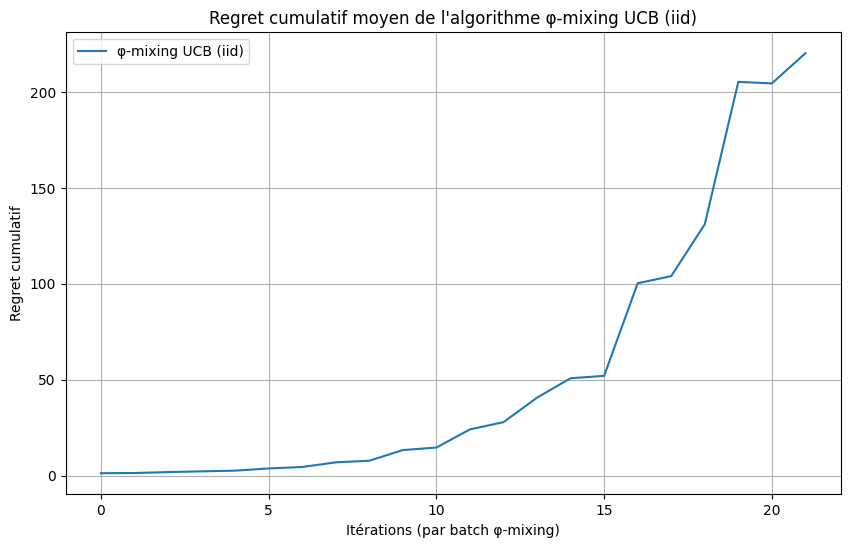

In [8]:


regret_avg = np.mean(regrets_mat, axis=0)

plt.figure(figsize=(10,6))
plt.plot(regret_avg, label="φ-mixing UCB (iid)")
plt.xlabel("Itérations (par batch φ-mixing)")
plt.ylabel("Regret cumulatif")
plt.title("Regret cumulatif moyen de l'algorithme φ-mixing UCB (iid)")
plt.grid(True)
plt.legend()
plt.show()


In [13]:
class UCBPhiMixing1:

    def __init__(self, arms, norm_phi_bound):
        self.arms = arms
        self.n_arms = len(arms)
        self.norm_phi_bound = norm_phi_bound
        self.selections = [0 for _ in range(self.n_arms)]
        self.t = 1
        self.emp_means = [[0] for _ in range(self.n_arms)]
        self.stationary_means = [stationary_mean(arm.states, arm.mat) for arm in self.arms]
        self.UCB_lists = [[] for _ in range(self.n_arms)]

    def choose_arm(self, selections, emp_mean, t):
        ksi = 1 + 8 * self.norm_phi_bound
        ucb = [
            emp_mean[i] + np.sqrt(8 * ksi * (1 / 8 + np.log(t)) / (2 ** selections[i]))
            + self.norm_phi_bound / (2 ** (selections[i] - 1))
            for i in range(self.n_arms)
        ]

        for arm_ind in range(self.n_arms):
            self.UCB_lists[arm_ind].append(ucb[arm_ind])

        return ucb.index(max(ucb))

    def update(self, arm_index, selections, t, reward_chains, n_rounds):
        sj = selections[arm_index]
        emp_mean = (1 / 2 ** sj) * sum(
            reward_chains[arm_index][t_prime]
            for t_prime in range(t, min(t + 2 ** sj, n_rounds))
        )
        selections[arm_index] += 1
        t += 2 ** sj
        return emp_mean, selections, t

    def construct_reward_chains(self):
        reward_chains = []
        means = []
        for arm in self.arms:
            a = arm.construct_reward_chain()
            reward_chains.append(a[0])
            means.append(a[1])
        return reward_chains, means

    def run(self, n_rounds):
        reward_chains, means = self.construct_reward_chains()
        rewards = []
        regrets = []
        expected_score = 0
        best_score = 0
        sum_reward_arm = [[] for _ in range(self.n_arms)]
        arm_chosen = []

        for i in range(self.n_arms):
            arm_chosen.append(i)
            self.emp_means[i].append(reward_chains[i][i])
            self.selections[i] += 1
            expected_score += means[i][i]
            mu_star = max(x[i] for x in means)
            best_score += mu_star
            regrets.append(best_score - expected_score)

        while self.t < n_rounds:
            arm_index = self.choose_arm(
                self.selections,
                [self.emp_means[i][-1] for i in range(self.n_arms)],
                self.t,
            )

            new_rewards = reward_chains[arm_index][self.t : self.t + 2 ** self.selections[arm_index]]
            rewards += new_rewards

            if not sum_reward_arm[arm_index]:
                last = 0
            else:
                last = sum_reward_arm[arm_index][-1]

            for x in new_rewards:
                sum_reward_arm[arm_index].append(last + x)
                last = x

            for i in range(2 ** self.selections[arm_index]):
                if self.t + i < n_rounds:
                    arm_chosen.append(arm_index)
                    expected_score += new_rewards[i]
                    mu_star = max(self.stationary_means)
                    best_score += mu_star
                    regrets.append(best_score - expected_score)

            new_emp_mean, self.selections, self.t = self.update(
                arm_index, self.selections, self.t, reward_chains, n_rounds
            )
            self.emp_means[arm_index].append(new_emp_mean)

        empirical_means = [
            [sum_reward_arm[arm_index][i] / (i + 1) for i in range(len(sum_reward_arm[arm_index]))]
            for arm_index in range(self.n_arms)
        ]

        return rewards, sum(rewards), regrets, empirical_means, self.UCB_lists, arm_chosen

   


In [ ]:

#parameters
n_plays = 20000
n_sim = 100
means_arms = [ 1/3, 1/4 ]   

#matrice pour stoquer les regrets
regrets_mat  = []

#simulation
for sim in range( n_sim  ):
    algo = UCBPhiMixing(arms = [0,1], norm_phi_bound = 0.9)
    cumulative_reward = 0
    regrets = []
    for t in range( 1 , n_plays + 1):
        arm = algo_UCB1.select_arm()
        reward = reward_chosen_arm(arm)
        cumulative_reward += reward 
        algo_UCB1.update(arm, reward)
        regret = t * max(means_arms) - np.sum([algo_UCB1.counts[i]*means_arms[i] for i in range(algo_UCB1.n_arms)])
        regrets.append( regret)
    
    regrets_mat.append(regrets)

# muyenne des regrets sur toutes simulations
regrets_plot = np.mean(regrets_mat, axis = 0)
